## 2. 전복 데이터를 가지고 딥러닝 회귀를 수행

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [4]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
X = X.values
X.shape

(4177, 9)

In [6]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y.shape

(4177, 30)

In [7]:
print(X.dtype)
print(Y.dtype)

object
float32


In [8]:
X = X.astype('float32')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_shape=(9,),activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [11]:
import numpy as np
N_EPOCHS = 30

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


2024-09-16 10:24:03.169923: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


105/105 [==============================] - 1s 2ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 2/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 3/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 4/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 5/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 6/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 7/30
105/105 [==============================] - 0s 2ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 8/30
105/105 [==============================] - 0s 1ms/step - loss: 0.0327 - mse:

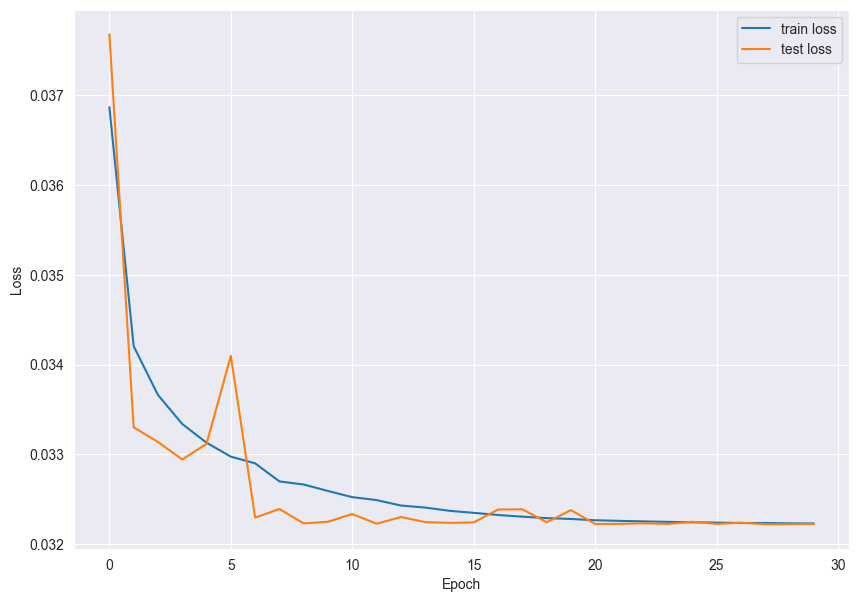

In [12]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.0322 - mse: 0.0322


[0.03222586587071419, 0.03222586587071419]